<a href="https://colab.research.google.com/github/J-Salt/IDS/blob/main/HW6/Project_6_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this problem, you will work with the loans_training and loans_test datasets found here: https://github.com/bforoura/IDS/tree/main/HW6 (Links to an external site.)

Create a CART model using the training data set that predicts Approval using Debt-to-Income Ratio, FICO Score, etc. Visualize the decision tree and Describe the first few splits in the decision tree.

Build a C5.0 model using the same predictors and target as in part 1.  This time, specify a minimum of 1000 cases per terminal node. Visualize the decision tree. Describe the first few splits in the decision tree.

How does your C5.0 model compare to your CART model for the loans_training data? Describe the similarities and differences.

###Importing libraries and data
---

In [22]:
library(readr)
library(rpart)
install.packages("rpart.plot")
library(rpart.plot)


loansTrain <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW6/Loans_Training.csv",show_col_types = FALSE)
loansTest <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW6/Loans_Test.csv",show_col_types = FALSE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



###Creating the CART decision tree
---

In [42]:
#create the tree
set.seed(144)
tree <- rpart(Approval ~ ., data = loansTrain, cp=0.01)
printcp(tree)


Regression tree:
rpart(formula = Approval ~ ., data = loansTrain, cp = 0.01)

Variables actually used in tree construction:
[1] Debt-to-Income Ratio FICO Score           Request Amount      

Root node error: 37575/150302 = 0.25

n= 150302 

        CP nsplit rel error  xerror       xstd
1 0.375362      0   1.00000 1.00001 6.6498e-06
2 0.128580      1   0.62464 0.62466 2.0653e-03
3 0.011336      2   0.49606 0.49636 2.3509e-03
4 0.010000      3   0.48472 0.48396 2.3315e-03


###Pruning the tree using the best CP value
---

In [39]:
bestcp <- tree$cptable[which.min(tree$cptable[,"xerror"]),"CP"] #Finds the best cp value for the dataset. I do not know how this works exactly and I will admit that I found this online. I felt it was useful so I kept it in.
tree.pruned <- prune(tree, cp = bestcp) #prunes the tree using the cp value obtained above

###Creating a confidence matrix
---

In [40]:
conf.matrix <- table(loansTrain$Approval, predict(tree.pruned))
rownames(conf.matrix) <- paste("Actual", rownames(conf.matrix), sep = ":")
colnames(conf.matrix) <- paste("Pred", colnames(conf.matrix), sep = ":")
print(conf.matrix)

              
               Pred:0.039302639015695 Pred:0.130428027654781
  Actual:FALSE                  44194                  11194
  Actual:TRUE                    1808                   1679
              
               Pred:0.598540820096047 Pred:0.809786721919627
  Actual:FALSE                   4347                  15331
  Actual:TRUE                    6481                  65268


###Visualize the decision tree
---
The first split is based on the persons FICO score. This break happens at 660.The next split occurs at a debt income ratio of 0.31. In the end he blue boxes predict those that are predicted to be approved which means by this prediction ~54% of people will be approved.

###Plotting the CART Tree
---

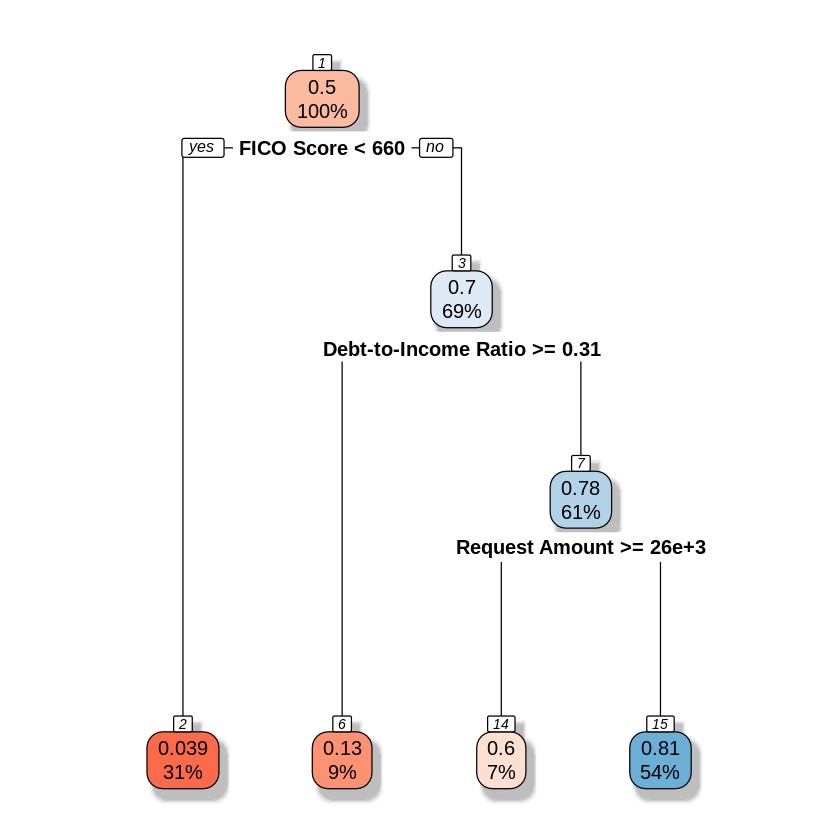

In [43]:
rpart.plot(tree, box.palette="RdBu", shadow.col="gray", nn=TRUE)


###C5.0 Classifier
---
Started by renaming the columns as the plot function could not use columns that had spaces in the name. Then I converted T/F values to numeric values to create the model. Next I used C50 to generate the C5.0 model and summarized the model.

In [ ]:
install.package("C50")

In [80]:
library(C50)
names(loansTrain) <- make.names(names(loansTrain), unique=TRUE) #remove spaces from column names for later
loansTrain$Approval<-as.factor(loansTrain$Approval) #Converts the T/F values to numeric
c5 <- C5.0(loansTrain[,2:5], loansTrain$Approval,control = C5.0Control(CF = .001,minCases = 2)) #Generate the decision tree
c5
summary(c5)


Call:
C5.0.default(x = loansTrain[, 2:5], y = loansTrain$Approval, control
 = C5.0Control(CF = 0.001, minCases = 2))

Classification Tree
Number of samples: 150302 
Number of predictors: 4 

Tree size: 12 

Non-standard options: attempt to group attributes, confidence level: 0.001



Call:
C5.0.default(x = loansTrain[, 2:5], y = loansTrain$Approval, control
 = C5.0Control(CF = 0.001, minCases = 2))


C5.0 [Release 2.07 GPL Edition]  	Wed Apr 20 03:23:45 2022
-------------------------------

Class specified by attribute `outcome'

Read 150302 cases (5 attributes) from undefined.data

Decision tree:

FICO.Score <= 656: FALSE (43749/1090)
FICO.Score > 656:
:...Debt.to.Income.Ratio > 0.31: FALSE (12077/1147)
    Debt.to.Income.Ratio <= 0.31:
    :...Debt.to.Income.Ratio > 0.25:
        :...Request.Amount > 25000: FALSE (1629/488)
        :   Request.Amount <= 25000:
        :   :...FICO.Score <= 672: FALSE (1374/626)
        :       FICO.Score > 672: TRUE (6779/2498)
        Debt.to.Income.Ratio <= 0.25:
        :...FICO.Score > 669: TRUE (75846/13356)
            FICO.Score <= 669:
            :...Request.Amount > 23000: FALSE (1220/469)
                Request.Amount <= 23000:
                :...FICO.Score > 661:
                    :...Debt.to.Income.Ratio <= 0.05

###Plotting the C5.0 decision tree
---

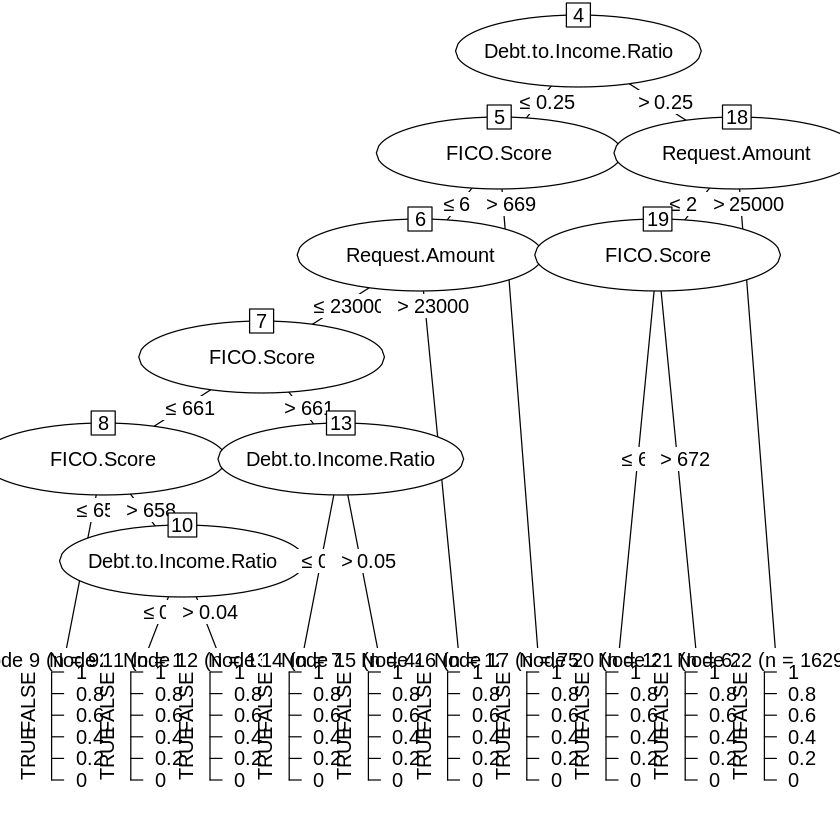

In [84]:
plot(c5, trial = 0, subtree = 4)

###Comparing both methods
---
I could not accurately compare the two classification models as for the C5.0 I couldnt find a way to visualize the tree without it being super condensed like above. But, considering that the tree above eventually ends with preditions for how many denials and approvals for each leaf I am more inclined to trust the c5.0 model over the cart model. I found it much easier working with the cart model and there are even ways to cusomize the trees that I was unable to do with the c5.0 model. Although the c5.0 model was way more difficult to use than the cart model I am willing to bet that in the end it would be the more accurate option. This is something that I would need more time to test to come to a more informed decision.